# Computational Physics
## Simple Harmonic Oscillators

<img src="http://i.imgur.com/l2WMuTN.gif">

In [1]:
import style
style._set_css_style('../include/bootstrap.css')

## Last Time

### [Notebook Link: 15_Baseball.ipynb](./15_Baseball.ipynb)

- motion of a pitched ball
- drag and the magnus force
- surface roughness of a projectile

## Today

- The simple harmonic pendulum

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'

## Equation of Motion

The equation of motion for a simple linear pendulum of length $\ell$ and mass $m$ is givn by:

$$ m \frac{d \vec{v}}{d t} = \vec{F}_{\rm g} = -m g \hat{y}$$

Measuring $x$ and $y$ from the equlibrium position we have 
\begin{align}
x &= \ell \sin \theta \\
y &= \ell (1-\cos\theta)
\end{align}

The kinetic and potential energy are:

\begin{align}
T &= \frac{1}{2} m \dot{r}^2 \\
&= \frac{1}{2} m (\dot{x}^2 + \dot{y}^2) \\
&= \frac{1}{2} m \ell^2 \dot{\theta}^2
\end{align}

\begin{equation}
V = m g \ell (1-\cos\theta).
\end{equation}

Thus, the Lagrangian is:
\begin{align}
\mathcal{L} &= T - V \\
&= \frac{1}{2} m \ell^2 \dot{\theta}^2 - m g \ell (1-\cos\theta) 
\end{align}
and the equation of motion is given by the Euler-Lagrange formula

\begin{align}
\frac{\partial \mathcal{L}}{\partial \theta} - \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\theta}} &= 0 \\
-m g \ell \sin \theta - \frac{d}{dt} (m\ell^2 \dot{\theta}) &= 0
\end{align}

which yields the familiar equation:
\begin{equation}
\ddot{\theta} = -\frac{g}{\ell} \sin\theta .
\end{equation}

To solve this analytically, we are used to considering only small angle oscillations allowing us to replace $\sin\theta \simeq \theta$ for $\theta \ll 1$.  For $\theta(0) = \theta_0 \ll 1$ and $\dot{\theta}(0) = 0$ can be it can be integrated to give

$$ \theta(t) = \theta_0 \cos \left( \sqrt{\frac{g}{\ell}} t \right).$$


<div class="span alert alert-success">
<h2> Programming challenge </h2>
Use the Euler method to directly integrate the full equation of motion and compare with the analytical expression for $\theta_0 = \pi/12$ and $\dot{\theta}(0) =0$ for $\ell = 0.25$ m. 

\begin{align}
\theta_{n+1} &= \theta_n + \omega_n \Delta t \\
\omega_{n+1} &= \omega_n - \frac{g}{\ell} \sin\theta_n \Delta t \\
\end{align}
</div>

<!--
    θ[n+1] = θ[n] + ω[n]*Δt
    ω[n+1] = ω[n] -(g/ℓ)*np.sin(θ[n])*Δt
-->

Text(0, 0.5, 'θ(t) [rad]')

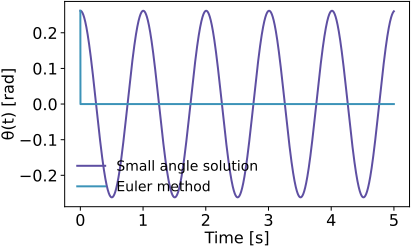

In [3]:
from scipy.constants import pi as π
from scipy.constants import g

# constants and intitial conditions
ℓ = 0.25 # m
Δt = 0.001 # s

t = np.arange(0.0,5.0,Δt)
θ,ω = np.zeros_like(t),np.zeros_like(t)
θ[0] = π/12.0 # rad

for n in range(t.size-1):
    pass

# the small angle solution
plt.plot(t, θ[0]*np.cos(np.sqrt(g/ℓ)*t), label='Small angle solution')

# the Euler method
plt.plot(t,θ, label='Euler method')
plt.legend(loc='lower left')

plt.xlabel('Time [s]')
plt.ylabel('θ(t) [rad]')

## What went wrong?

The oscillations are **growing** with time!  This is our first encounter with a numerical procedure that is **unstable**.  

Let's examine the total energy of the system where we can approximate $\cos\theta \simeq 1 - \theta^2/2$:

\begin{align}
E &= \frac{1}{2} m \ell^2 \omega^2 + m g \ell (1-\cos\theta) \\
&\simeq \frac{1}{2}m \ell^2 \left(\omega^2 + \frac{g}{\ell}\theta^2 \right).
\end{align}

Writing things in terms of our Euler variables:

\begin{align}
E_{n+1} &= \frac{1}{2}m\ell^2 \left[\left(\omega_n - \frac{g}{\ell}\theta_n \Delta t\right)^2 + \frac{g}{\ell}\left(\theta_n + \omega_n\Delta t\right)^2 \right] \\
&= E_{n} + \frac{1}{2}mg \ell \left(\omega_i^2 + \frac{g}{\ell} \theta_n^2\right) \Delta t^2.
\end{align}

This tells us the origin of the problem: **the energy is increasing without bound, regardless of the size of $\Delta t$**.

### Question: Why didn't we encounter this problem previously?

<!-- With the exception of constant acceleration, we always had it, we just never noticed it on the timescales we were interested in. -->

### How do we fix it?

We can consider alternative higher-order ODE solvers (as described in Appendix A of the textbook).  However, there is a very simple fix that works here:

### Euler-Cromer Method
Looking at our original discretized equations:

\begin{align}
\theta_{n+1} &= \theta_n + \omega_n \Delta t \\
\omega_{n+1} &= \omega_n - \frac{g}{\ell} \sin\theta_n \Delta t
\end{align}

we can make the simple observation that we can replace the order of evaluation and use the updated value of $\omega$ in our calculation of $\theta$.

\begin{align}
\omega_{n+1} &= \omega_n - \frac{g}{\ell} \sin\theta_n \Delta t \\
\theta_{n+1} &= \theta_n + \omega_{n+1} \Delta t
\end{align}

This leads to the energy being *approximately* conserved at each step:

\begin{equation}
E_{n+1} = E_{n} + \frac{1}{2}m g \left(\omega_n^2 - \frac{g}{\ell}\theta_n^2 \right)\Delta t^2 + \mathrm{O}(\Delta t^3).
\end{equation}


Text(0, 0.5, 'θ(t) [rad]')

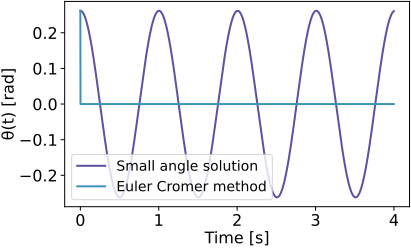

In [4]:
from scipy.constants import pi as π
from scipy.constants import g

# constants and intitial conditions
ℓ = 0.25 # m
Δt = 0.001 # s

t = np.arange(0.0,4.0,Δt)
θ,ω = np.zeros_like(t),np.zeros_like(t)
θ[0] = π/12.0 # rad

for n in range(t.size-1):
    pass

# the small angle solution
plt.plot(t, θ[0]*np.cos(np.sqrt(g/ℓ)*t), label='Small angle solution')

# the Euler-Cromer method
plt.plot(t,θ, label='Euler Cromer method')
plt.legend(loc='lower left',frameon=True)

plt.xlabel('Time [s]')
plt.ylabel('θ(t) [rad]')

## There are still some noticable deviations, thoughts?


<!--Non-linear corrections. -->

## Turning on Non-Linearity

An analytical solution exists without the small-angle approximation, but it is considerably more complicated:

\begin{align}
\theta(t) &=& 2 \sin^{-1} \left\{ k\, \mathrm{sn}\left[K(k^2)-\sqrt{\frac{g}{\ell}} t; k^2\right] \right\} \newline
k &=& \sin \frac{\theta_0}{2} \newline
K(m) &=& \int_0^1 \frac{d z}{\sqrt{(1-z^2)(1-m z^2)}}
\end{align}

<!--



# the exact solution
plt.plot(t,non_linear_θ(ℓ,θ[0],t), label='Exact solution')

-->

In [5]:
def non_linear_θ(ℓ,θₒ,t):
    '''The solution for θ for the non-linear pendulum.'''
    # use special functions
    from scipy import special
    k = np.sin(θₒ/2.0)
    K = special.ellipk(k*k)
    (sn,cn,dn,ph) = special.ellipj(K-np.sqrt(g/l)*t,k*k)
    return 2.0*np.arcsin(k*sn)

Text(0, 0.5, 'θ(t) [rad]')

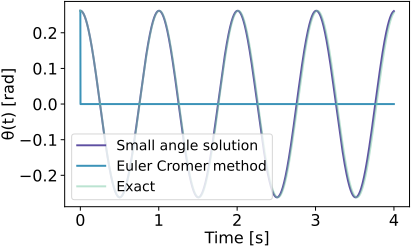

In [6]:
# the small angle solution
plt.plot(t, θ[0]*np.cos(np.sqrt(g/ℓ)*t), label='Small angle solution')

# the Euler-Cromer method
plt.plot(t,θ,label='Euler Cromer method')

# the exact solution in terms of special functions
plt.plot(t,non_linear_θ(ℓ,θ[0],t), label='Exact', alpha=0.5)
plt.legend(loc='lower left',frameon=True)

plt.xlabel('Time [s]')
plt.ylabel('θ(t) [rad]')